<a href="https://colab.research.google.com/github/ybernaerts/varimax-gradient/blob/main/algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
L = 5 # pick latent dimension
N = 10 # pick number of neurons

iters = 500
lr = .01

**Note:** Though the learning rate and number of iterations are chosen such that the varimax objective typically converges to a maximum, it is possible one still needs to reduce the learning rate and/or increase the amount of iterations.

## Sample rotation and loading matrix

Imagine we have a loading matrix (N neurons by L latents) which we want to rotate so as to satisfy the varimax objective.

In [3]:
C_init = np.random.randn(N,L)

Text(0, 0.5, 'Latent 2')

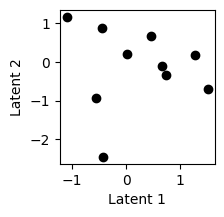

In [4]:
# plotting just first two latents
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.scatter(C_init[:,0],C_init[:,1], color='k')
ax.set_xlabel('Latent 1')
ax.set_ylabel('Latent 2')

In [5]:
# current varimax objective per latent
1/N*np.sum(C_init**4, axis=0)-(1/(N**2))*np.sum(C_init**2,axis=0)**2

array([0.50589749, 2.95470785, 0.06685005, 1.87439409, 1.59131356])

In [6]:
# final varimax objective
np.sum(
    1/N*np.sum(C_init**4, axis=0)-(1/(N**2))*np.sum(C_init**2,axis=0)**2
)

np.float64(6.993163043348714)

## Check Analyticity

Checking analytically derived gradient of varimax objective wrt $\mathbf{C}$.

In [7]:
def varimax(C):
  N = C.shape[0]
  return np.sum(1/N*np.sum(C**4, axis=0)-(1/(N**2))*np.sum(C**2,axis=0)**2)

In [8]:
f=lambda C: varimax(C)
def finite_difference_gradient(f, C, h=1e-5):
    grad = np.zeros_like(C)
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            E = np.zeros_like(C)
            E[i, j] = 1
            grad[i, j] = (f(C + h * E) - f(C - h * E)) / (2 * h)
    return grad

In [9]:
finite_difference_gradient(f, C_init)

array([[ 4.62051160e-01, -6.74059034e-02,  3.93747886e-02,
        -9.61505886e-01, -2.12056840e+00],
       [ 9.53212094e-01,  1.46574617e-01, -7.21494082e-03,
        -2.03860851e-02,  1.98552837e-01],
       [-6.99683799e-02,  4.61092811e-02, -3.63742028e-03,
        -3.00855001e+00,  1.25725396e+00],
       [-5.25412003e-03, -8.30180044e-02,  2.25383756e-04,
        -1.45481912e-01,  3.67919227e-01],
       [ 8.69832037e-02,  4.89154461e-02,  7.81411688e-02,
         5.97125226e-02,  5.31183932e-02],
       [-8.95928461e-02, -1.52233073e-01,  6.98693094e-03,
         1.11659344e-01,  1.02146892e-01],
       [-4.37060769e-02,  1.19544682e-01, -8.33861985e-02,
        -1.49434651e-01, -2.09258644e-01],
       [ 8.78367701e-02, -4.90457902e+00,  6.96094915e-03,
        -1.47871030e-01, -1.87505079e-01],
       [ 8.93407536e-02, -8.71410125e-02, -1.57976254e-01,
         5.71710901e-02, -1.92605820e-01],
       [-2.23090677e-01,  1.62308871e-01,  1.26475181e-02,
         9.36263814e-02

In [10]:
s = 1/N*np.sum(C_init**2, axis=0)
S = np.repeat(s[np.newaxis,:],N,axis=0)
G = 4/N*(C_init**3-np.multiply(C_init,S))
G

array([[ 4.62051160e-01, -6.74059034e-02,  3.93747886e-02,
        -9.61505886e-01, -2.12056840e+00],
       [ 9.53212094e-01,  1.46574617e-01, -7.21494083e-03,
        -2.03860852e-02,  1.98552837e-01],
       [-6.99683800e-02,  4.61092811e-02, -3.63742028e-03,
        -3.00855001e+00,  1.25725396e+00],
       [-5.25412004e-03, -8.30180044e-02,  2.25383764e-04,
        -1.45481912e-01,  3.67919227e-01],
       [ 8.69832037e-02,  4.89154461e-02,  7.81411688e-02,
         5.97125226e-02,  5.31183932e-02],
       [-8.95928462e-02, -1.52233073e-01,  6.98693097e-03,
         1.11659344e-01,  1.02146892e-01],
       [-4.37060770e-02,  1.19544682e-01, -8.33861985e-02,
        -1.49434651e-01, -2.09258644e-01],
       [ 8.78367701e-02, -4.90457902e+00,  6.96094913e-03,
        -1.47871030e-01, -1.87505079e-01],
       [ 8.93407537e-02, -8.71410126e-02, -1.57976254e-01,
         5.71710901e-02, -1.92605820e-01],
       [-2.23090677e-01,  1.62308871e-01,  1.26475181e-02,
         9.36263813e-02

$\mathbf{G}$, our analytical gradient (check `derivation.pdf`) should be the same as what our function `finite_differences()` outputs.

Checking analytically derived gradient of varimax w.r.t. a random $\mathbf{R}$, using the chain rule:

In [11]:
R = np.random.randn(L,L)
U, _, Vt = np.linalg.svd(R)
R = U @ Vt

In [12]:
def varimax_R(C, R):
  N = C.shape[0]
  C_rot = C @ R
  return np.sum(1/N*np.sum(C_rot**4, axis=0)-(1/(N**2))*np.sum(C_rot**2,axis=0)**2)

In [13]:
f_R=lambda C,R: varimax_R(C,R)
def finite_difference_gradient_R(f_R, C, R, h=1e-5):
    grad = np.zeros_like(R)
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            E = np.zeros_like(R)
            E[i, j] = 1
            grad[i, j] = (f_R(C,R + h * E) - f_R(C,R - h * E)) / (2 * h)
    return grad

In [14]:
finite_difference_gradient_R(f_R,C_init,R)

array([[-0.37109181, -0.32250195,  0.4606265 , -5.87866641, -2.15332199],
       [ 0.15006441, -1.45369244,  1.88605691, -1.04532614,  3.66107014],
       [ 0.20346417, -0.06183783, -0.53691571, -2.50283234, -0.97106613],
       [ 2.72497691,  0.33648807,  0.93826592,  8.59675608, -1.04910577],
       [-5.35164587,  0.28620643,  0.19053663,  5.54469602, -0.75502783]])

In [15]:
s = 1/N*np.sum((C_init @ R)**2, axis=0)
S = np.repeat(s[np.newaxis,:],N,axis=0)
G_R = 4/N*C_init.T @ ((C_init @ R)**3-np.multiply(C_init @ R,S))
G_R

array([[-0.37109181, -0.32250195,  0.4606265 , -5.87866641, -2.15332199],
       [ 0.15006441, -1.45369244,  1.88605691, -1.04532614,  3.66107014],
       [ 0.20346417, -0.06183783, -0.53691571, -2.50283234, -0.97106613],
       [ 2.72497691,  0.33648807,  0.93826592,  8.59675608, -1.04910577],
       [-5.35164587,  0.28620643,  0.19053663,  5.54469602, -0.75502783]])

Like before, these should also be the same.

## Projected gradient ascent.

Now we would like our eventual gradient $\mathbf{P}$, when taken a step in that direction from $\mathbf{R}$, to give us another orthogonal matrix (hence satisfying $(\mathbf{R}+\eta\mathbf{P})^\top(\mathbf{R}+\eta\mathbf{P})=\mathbf{I}$. To ensure this, $\mathbf{P}$ is of a certain form (`derivation.pdf`), yet this only ensures orthogonality up to first order. We hence do a projection onto the Stiefel manifold (manifold of orthogonal matrices) with svd-decomposition of $\mathbf{R}+\eta\mathbf{P}$. Yet, reflections belong to this manifold too, thus we ensure additionally that the determinant of the projection is +1 (not -1) and hence maximize over rotation matrices only.

In [16]:
R = np.eye(L) # start from unitary matrix

Cv = C_init.copy()
Rv = R.copy()

varimaxes = []
varimaxes.append(varimax(C_init@R))

Rs = []
Rs.append(R)

for it in range(iters):
  # calculate gradient for R
  C_rot = Cv @ Rv
  s = 1/N*np.sum(C_rot**2, axis=0)
  S = np.repeat(s[np.newaxis,:],N,axis=0)
  grad = 4/N*Cv.T @ (C_rot**3-np.multiply(C_rot,S))
  P = 1/2*(grad - Rv @ grad.T @ Rv)

  # apply grad
  Rv = Rv + lr*P

  # project to manifold of rotation matrices
  U, _, Vt = np.linalg.svd(Rv)
  R_new = U @ Vt
  if np.linalg.det(R_new) < 0:
      U[:, -1] *= -1
      R_new = U @ Vt

  Rv = R_new

  varimaxes.append(varimax(C_init@Rv))
  Rs.append(Rv)

In [17]:
# check:
Rv @ Rv.T

array([[ 1.00000000e+00, -9.52593880e-17,  7.25410782e-17,
         9.95826536e-17, -1.06548079e-16],
       [-9.52593880e-17,  1.00000000e+00,  7.48900002e-17,
         7.70126551e-17, -1.84458492e-16],
       [ 7.25410782e-17,  7.48900002e-17,  1.00000000e+00,
         8.42833475e-18, -1.24973649e-16],
       [ 9.95826536e-17,  7.70126551e-17,  8.42833475e-18,
         1.00000000e+00,  1.56434438e-16],
       [-1.06548079e-16, -1.84458492e-16, -1.24973649e-16,
         1.56434438e-16,  1.00000000e+00]])

In [18]:
varimax(C_init@R)

np.float64(6.993163043348714)

In [19]:
varimax(C_init@Rv)

np.float64(14.937615286271493)

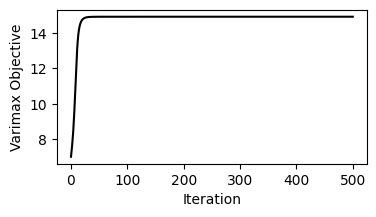

In [20]:
fig, ax = plt.subplots(1,1,figsize=(4,2))
ax.plot(varimaxes, color='k')
ax.set_xlabel('Iteration')
ax.set_ylabel('Varimax Objective')
plt.show()

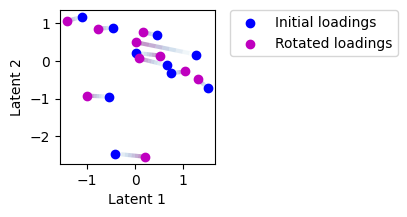

In [21]:
# plotting just first two latents
fig, ax = plt.subplots(1,1,figsize=(2,2))
ax.scatter(C_init[:,0],C_init[:,1], color='b', label='Initial loadings')
ax.scatter((C_init @ Rv)[:,0],(C_init @ Rv)[:,1], color='m', label='Rotated loadings')
for n in range(N):
    x = np.linspace(C_init[n,0],(C_init @ Rv)[n,0], 10)
    y = np.linspace(C_init[n,1],(C_init @ Rv)[n,1], 10)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    norm = plt.Normalize(0, 1)
    lc = LineCollection(segments, cmap='BuPu', norm=norm)
    lc.set_array(np.linspace(0, 1, 10))
    lc.set_linewidth(3)
    lc.set_alpha(0.5)
    lc.set_zorder(0)
    line = ax.add_collection(lc)
ax.set_xlabel('Latent 1')
ax.set_ylabel('Latent 2')
ax.legend(loc=(1.1,.7))

Finally, let us do it for multiple different rotation matrix initializations.

In [22]:
inits=100

Cv = C_init.copy()

varimaxes = np.zeros((inits, iters+1))

for init in range(inits):
  R = np.random.randn(L,L)
  U,_,Vt = np.linalg.svd(R)
  R = U @ Vt
  if np.linalg.det(R) < 0:
        U[:, -1] *= -1
        R = U @ Vt
  Rv = R.copy()
  varimaxes[init,0] = varimax(Cv@R)

  for it in range(iters):
    C_rot = Cv @ Rv
    s = 1/N*np.sum(C_rot**2, axis=0)
    S = np.repeat(s[np.newaxis,:],N,axis=0)
    grad = 4/N*Cv.T @ (C_rot**3-np.multiply(C_rot,S))
    P = 1/2*(grad - Rv @ grad.T @ Rv)

    # apply grad
    Rv = Rv + lr*P

    # project to manifold of rotation matrices
    U, _, Vt = np.linalg.svd(Rv)
    R_new = U @ Vt
    if np.linalg.det(R_new) < 0:
        U[:, -1] *= -1
        R_new = U @ Vt

    Rv = R_new

    varimaxes[init,it+1] = varimax(Cv@Rv)

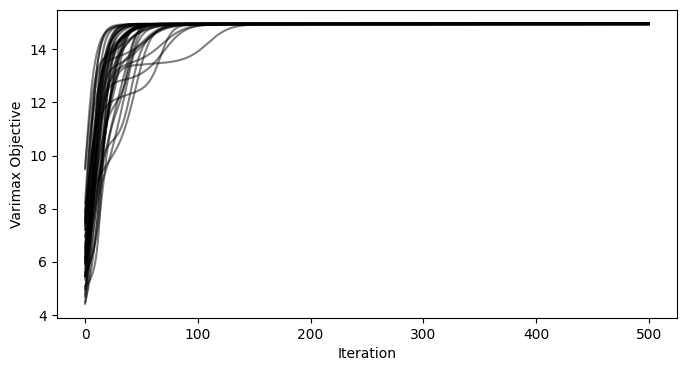

In [23]:
# plotting just first 40 learning trajectories
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(varimaxes[:40,:].T, color='k', alpha=0.5);
ax.set_xlabel('Iteration')
ax.set_ylabel('Varimax Objective')
plt.show()